# Simple Linear Regression for Automobile mpg Data

In this demo, you will see how to:
* Load data from a text fileausing the `pandas` package
* Create a scatter plot of data
* Handle missing data
* Fit a simple linear model
* Plot the linear fit with the test data
* Use a nonlinear transformation for an improved fit

## Loading the Data

The python [`pandas`](http://pandas.pydata.org/) library is a powerful package for data analysis.  In this course, we will use a small portion of its features -- just reading and writing data from files.  After reading the data, we will convert it to `numpy` for all numerical processing including running machine learning algorithms.

We begin by loading the packages.

In [1]:
import pandas as pd
import numpy as np

The data for this demo comes from a survey of cars to determine the relation of mpg to engine characteristics.  The data can be found in the UCI library:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg

### Try 1:  Loading the Data Incorrectly

The pandas has very good methods for loading data from ASCII tables. In this case, we want to read the data in the file:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Since the file is a CSV file (comma-separated-values), we can try to use the `read_csv` command:

This creates a pandas *dataframe*. We can see the first six lines of the dataframe with `head` command:

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

There were three errors:
* All the data appeared in one column.  That is, the columns were not "delimited" correctly
* The first line got mistook as a header
* The columns are missing their header names

In [3]:
df.head(6)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...


### Try 2: Fixing the Errors in the loading

The problems above are common.  Often it takes a few times to load the data correctly.  That is why it is
good to look at the first few elements of the dataframe before proceeding.
After some googling you can find out that you need to specify some other options to the `read_csv` command.
First, you need to supply the names of the columns.  In this case, I have supplied them manually based on the
description in the UCI website:

In [4]:
names = ['mpg', 'cylinders','displacement', 'horsepower',
         'weight', 'acceleration', 'model year', 'origin', 'car name']

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

/tmp/ipython-input-3245505254.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+


If you re-run `head` command now, you can see the loading was correct. You can see the column names, index, and values:

## Manipulating the Data
We can get the `shape` of the data, which indicates the number of samples and number of attributes

In [6]:
df.shape

(398, 9)

You can also see the three components of the `dataframe` object.  The dataframe is stored in a table (similar to a SQL table if you know databases).  In this case, there is one row for each car and the attributes of the car are stored in the columns.  The command `df.columns` returns the names of the columns.

In [7]:
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

The field `df.index` returns the indices of the rows.  In this case, they are just enumerated 0,1,...

In [9]:
df.index

RangeIndex(start=0, stop=398, step=1)

Finally, `df.values` is a 2D array with values of the attributes for each car.  Note that the data can be *heterogeneous*:  Some entries are integers, some are floating point values and some are strings.

In [10]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

The `df.columns` attribute is not a python list, but a `pandas`-specific data structure called an `Index`.  To convert to a list, use the `tolist()` method:

In [11]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

You can select subsets of the attributes with indexing.  For example, this selects one attribute, which returns what is called a pandas `Series`

In [12]:
df2 = df['cylinders']
df2.head(6)

,cylinders
0,8
1,8
2,8
3,8
4,8
5,8


In [13]:
df2 = df[['cylinders','horsepower']]
df2.head(6)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0


## Plotting the Data
We load the `matplotlib` module to plot the data.  This module has excellent plotting routines that are very similar to those in MATLAB

In [14]:
import matplotlib
import matplotlib.pyplot as plt

First, we need to convert the dataframes to numpy arrays:

In [15]:
xstr = 'displacement'
x = np.array(df[xstr])
y = np.array(df['mpg'])

Then, we can create a scatter plot

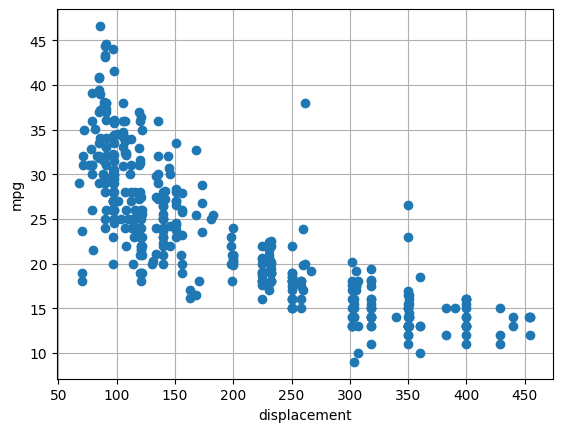

In [16]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

## Manipulating Numpy arrays

Once the data is converted to a numpy array, we can perform many useful simple calculations.  For example, we can compute the sample mean:

In [17]:
mx = np.mean(x)
my = np.mean(y)
print('Mean {0:s} = {1:5.1f}, mean mpg= {2:5.1f}'.format(xstr, mx, my))

#使用 format() 方法对输出内容进行格式化
#{0:s} 表示插入第一个参数 xstr（字符串类型）
#{1:5.1f} 表示插入第二个参数 mx（浮点数类型，总宽度 5 位，保留 1 位小数）
#{2:5.1f} 表示插入第三个参数 my（同样是浮点数，格式与 mx 相同）

Mean displacement = 193.4, mean mpg=  23.5


Fraction of cars with > 25 mpg:

Then, we can repeat the `read_csv` command with the correct options.

In [18]:
np.mean(y > 25)

np.float64(0.3969849246231156)

Sample mean displacement for the cars that have mpg > 25

In [19]:
I = (y>25)
np.mean(x*I)/np.mean(I)
#数组 x 与布尔数组 I 逐元素相乘（NumPy 广播机制，确保 x 与 I 长度一致）。
#对 x 中 “对应 I 为 1（即 y>25）” 的元素：保留原数值（如 x[i] * 1 = x[i]）；
#对 x 中 “对应 I 为 0（即 y≤25）” 的元素：结果变为 0（如 x[i] * 0 = 0）。
#np.mean(...) 作用：计算上述乘积结果的 “平均值”—— 但由于不满足条件的元素已被置为 0，实际等效于 “满足 y>25 的 x 元素之和” 除以 “x 的总长度”。
#（2）分母 np.mean(I)
#运算逻辑：计算布尔数组 I 的平均值。由于 I 中 True=1、False=0，平均值本质是 “满足 y>25 的元素个数” 除以 “y 的总长度”（与 x 总长度一致，因 x*I 需匹配）。
#（3）整体比值的意义


np.float64(110.08227848101266)

You can also do the previous command with [boolean indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html).

In [ ]:
#import pandas as pd

# 创建示例数据
data = {
    '姓名': ['张三', '李四', '王五', '赵六', '钱七'],
    '年龄': [17, 18, 16, 19, 17],
    '数学成绩': [85, 78, 92, 88, 76],
    '语文成绩': [76, 90, 82, 79, 88]
}

df = pd.DataFrame(data)

# 使用布尔索引筛选数据
# 条件1：数学成绩 > 80
condition1 = df['数学成绩'] > 80
# 条件2：年龄 < 18
condition2 = df['年龄'] < 18

# 组合条件（两个条件都要满足）
filtered_df = df[condition1 & condition2]

print("原始数据:")
print(df)
print("\n筛选后的数据（数学成绩>80且年龄<18）:")
print(filtered_df)

In [20]:
np.mean(x[I])

np.float64(110.08227848101266)

**In-Class Problem**:  Using the techniques above to:
* Load the acceleration variables in `df['acceleration']`  to a `np.array` called `acc`.
* Create a scatter plot of `mpg` vs. `acc`.
* Add grid lines to your plot and label the axes with the `plt.xlabel` and `plt.ylabel` functions.

Note that the acceleration here is the time from going to 0 to 60 mph, so a higher number is a *lower* acceleration.  That is, `acc` is really inverse acceleration.

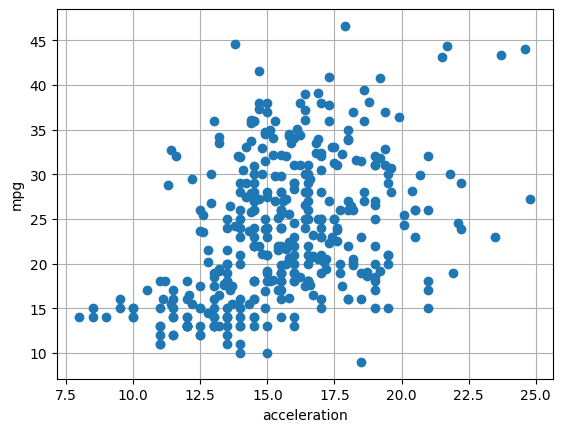

In [47]:
# TODO:
#  acc = ...
#  pl.plot(...)
df_clean = df[['mpg', 'acceleration']].dropna()
acc = df_clean['acceleration'].values
mpg = df_clean['mpg'].values
plt.plot(acc,mpg,'o')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.grid(True)

**In-class Problem**:  Find the average mpg of cars that have `acc > 15`.  Print your result.

In [48]:
# TODO:
Y = (acc>15)
np.mean(mpg[Y])

np.float64(25.850230414746544)

## Plotting Functions

The `matplotlib.pyplot` package combined with `numpy` has very powerful tools for creating plots.  For example, suppose we wish to plot `f1(t) = exp(-0.2*t)` vs. `t`.  For those familiar with MATLAB, the syntax is very similar.

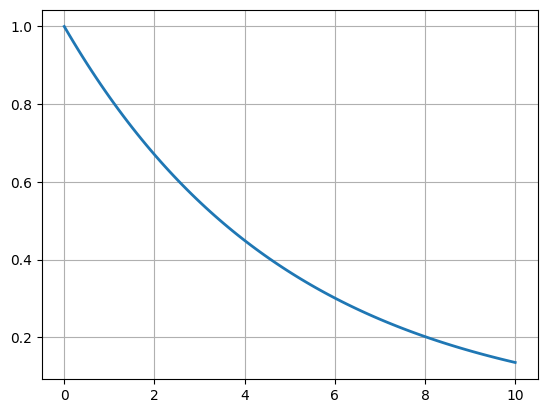

In [23]:
t = np.linspace(0,10,100)  # 100 points linearly spaced from 0 to 5
f1 = np.exp(-0.2*t)
plt.plot(t,f1,lw=2)  # lw=2 makes a little thicker line.  easier to read
plt.grid()

We can also super-impose plots:

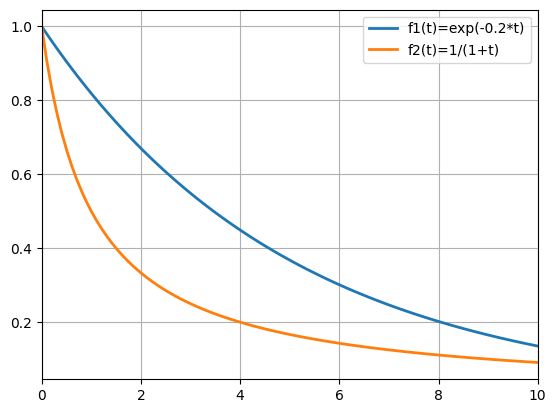

In [24]:
f2 = 1/(1+t)
plt.plot(t,f1,lw=2)
plt.plot(t,f2,lw=2)
plt.grid()
plt.xlim([0,10])
plt.legend(['f1(t)=exp(-0.2*t)', 'f2(t)=1/(1+t)'])

## Missing Data and NaN Values

Now, try a different field, horsepower

In [25]:
xstr = 'horsepower'
x = np.array(df[xstr])
y = np.array(df['mpg'])
np.mean(x)

np.float64(nan)

When you get the mean, it gives `nan` which means not a number.  The reason is that there was missing data in the orginal file and the `load_csv` function put `nan` values in the places where the data was missing.  This is very common.  To remove the rows with the missing data, we can use the `dropna` method:

In [26]:
df1 = df[['mpg','horsepower']]
df2 = df1.dropna()
df2.shape

(392, 2)

We can see that some of the rows have been dropped.  Specifically, the number of samples went from 396 to 392.  We can now compute the mean using the reduced dataframe.

In [27]:
x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

np.float64(104.46938775510205)

And, we can plot the data.

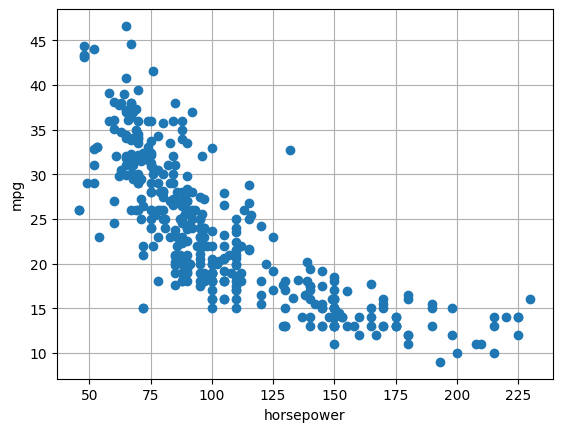

In [28]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

## Guessing a Fit for the Data

From the scatter plot above, you can see there is a relation between `y` vs. `x`.  Machine learning is about learning these relations.  We will discuss many ways to fit these relations automatically, but let us see first if you can guess a decent relation.

**In-class exercise**:

* Guess some relation `yhat = f(x)` where `yhat` is the predicted value of `y` given `x`.  So, `f(x)` should be some function that matches the data you see well.
* To visualize the relation, create a vector `xp = np.linspace(20,250,100)` on which you will plot the values of your predicted function.
* Compute `yhatp` on the values of `xp`.
* On a single plot, plot the `yp` vs. `xp` as well as the scatter plot of `y` vs. `x`.

Did you get a good fit?  

In [29]:
# TODO:
#  xp = np.linspace(20,250,100)
#  yhatp = ...  # some function of xp
#  plt.plot(...)


## Splitting Data into Training and Test

Now we will try to optimally *fit* a model to the data.  When doing this, we need to split the data into training and test, where we fit the model on the training data and evaluate it on the test data.  We will discuss this in detail in subsequent units, but the reason we need to do this is that we want to evaluate the fit on *new* data points, not in the test data.  

To split the data, we take some fraction, say 0.5, for training and the other fraction for test.

In [30]:
n = len(x)     # Total number of samples
ntr = n // 2   # number of training samples
nts = n - ntr   # number of test samples

print('number of samples = %d' % n)
print('number of training = %d' % ntr)
print('number of test = %d' % nts)

number of samples = 392
number of training = 196
number of test = 196


We then shuffle the samples and get the first `ntr` for training and the remaining for test.

In [31]:
I = np.random.permutation(n)

# Training samples
xtr = x[I[:ntr]]
ytr = y[I[:ntr]]

# Test
xts = x[I[ntr:]]
yts = y[I[ntr:]]

We can plot the training and test samples.

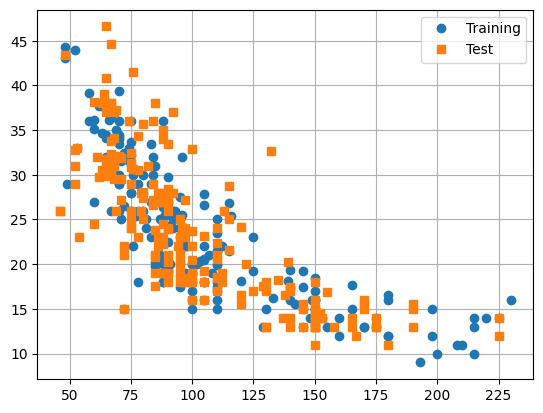

In [32]:
plt.plot(xtr,ytr,'o')
plt.plot(xts,yts,'s')
plt.grid()
plt.legend(['Training', 'Test'])

## Computing and Plotting a Linear Fit

One simple and widely-used model is the linear fit, `yhat = beta0 + beta1*x` where:

* `beta0` is called the *intercept* or *bias*
* `beta1` is called the *slope* or or *weight*

In class, we derive optimal formulae:

    beta1 = syx / sxx,    beta0 = ym - beta1*xm
    
where `xm` and `ym` are the sample means and `syx` and `sxx` are the cross- and auto-covariances.  We find the parameters on the training data.

In [33]:
xm = np.mean(xtr)
ym = np.mean(ytr)
syy = np.mean((ytr-ym)**2)
syx = np.mean((ytr-ym)*(xtr-xm))
sxx = np.mean((xtr-xm)**2)
beta1 = syx/sxx
beta0 = ym - beta1*xm

print("xbar     ={0:7.2f},       ybar={1:7.2f}".format(xm,ym))
print("sqrt(sxx)={0:7.2f},  sqrt(syy)={1:7.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0={0:7.2f}, beta1={1:7.2f}".format(beta0,beta1))

xbar     = 106.94,       ybar=  23.16
sqrt(sxx)=  40.75,  sqrt(syy)=   7.69
beta0=  39.29, beta1=  -0.15


We can create a plot of the regression line on top of the scatter plot.  The vector `xplt` are the x-coordinates of the two endpoints of the line.  They are chosen so that the line fits nicely in the plot.

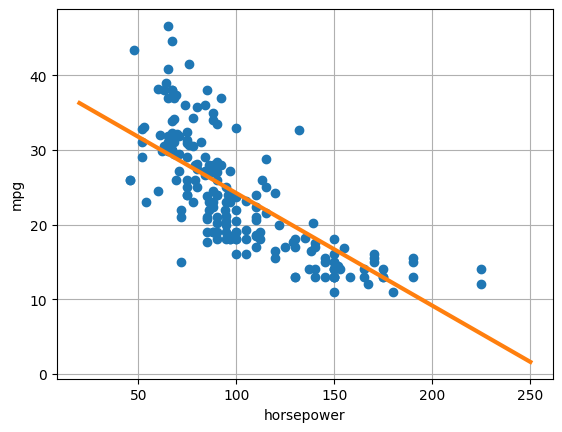

In [34]:
# Points on the regression line
xplt = np.array([20,250])
yplt = beta1*xplt + beta0

plt.plot(xts,yts,'o')                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

We next compute the mean squared error (MSE) of the fit:

* `mse_tr`:  MSE on the training data.  This number is how well model fits the training data.
* `mse_ts`:  MSE on the test data.  This number is more useful since it represents how well the fit is on *new* points not in the training data set.

We will discuss the difference between training and test more later.  In this case, you may see that the MSE on the test data is a little higher.

In [35]:
# Training MSE
yhat_tr=beta0+beta1*xtr
mse_tr = np.mean((ytr-yhat_tr)**2)

# Test MSE
yhat_ts =beta0+beta1*xts
mse_ts = np.mean((yts-yhat_ts)**2)


print("MSE training = %7.4f" % mse_tr)
print("MSE test     = %7.4f" % mse_ts)

MSE training = 21.4580
MSE test     = 26.5939


Let us see whether this is the same as the analytically derived minimal RSS

In [36]:
rxy=syx/np.sqrt(sxx)/np.sqrt(syy)
mse_min =(1-rxy*rxy)*syy
print('MSE theoretical = %7.4f' % mse_min)

MSE theoretical = 21.4580


**In-class exercise**:  Find the MSE on the test data points for the following three regions of `x`:

*  `x <= 100`
*  `x > 100` and `x <= 150`
*  `x > 150`

Which interval is the linear model most accurate?

Bonus:  Try to do this with a loop over the three intervals.  

In [37]:
# TODO.

## Nonlinear Transformation

We see that the linear regression captures the general trend of the relation between `y=mpg` and `x=horsepower`.  However, the trend does not really appear linear - instead it has an inverse type relation.   So, a natural idea is to use a *nonlinear transformation*:
* Transform the data `z=1/y`
* Fit `z` vs. `x` with a linear model:  $\hat{z}=\beta_0 + \beta_1x$.
* Invert the nonlinear relation for a model for `y`:  $\hat{y} = \hat{z}=1/(\beta_0 + \beta_1x)$.

We begin then by computing `z` and plotting a scatter plot of `z` vs. `x`.  Note that `z` represented gallons per mile (1/mpg).

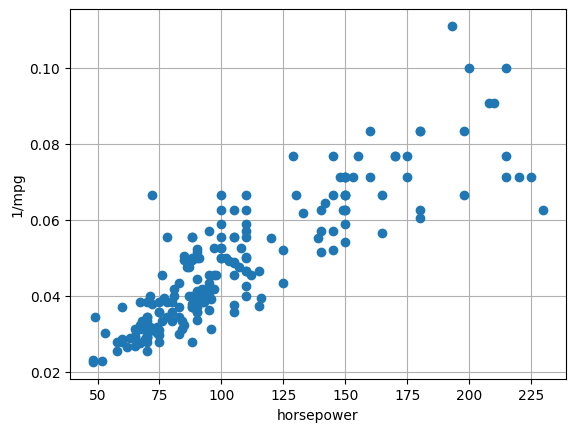

In [38]:
ztr = 1/ytr
plt.plot(xtr,ztr,'o')
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)

We see a clear linear relation between `z` (1/mpg) and `x` (horsepower). We can fit a linear model,
$z = \beta_0 + \beta_1 x$.  

In [39]:
# Use linear regression to fit `z` vs. `x`
xm = np.mean(xtr)
zm = np.mean(ztr)
sxz = np.mean((ztr-zm)*(xtr-xm))
sxx = np.mean((xtr-xm)**2)
beta1_inv = sxz/sxx
beta0_inv = zm - beta1_inv*xm

We can create a plot of the regression line on top of the scatter plot.  

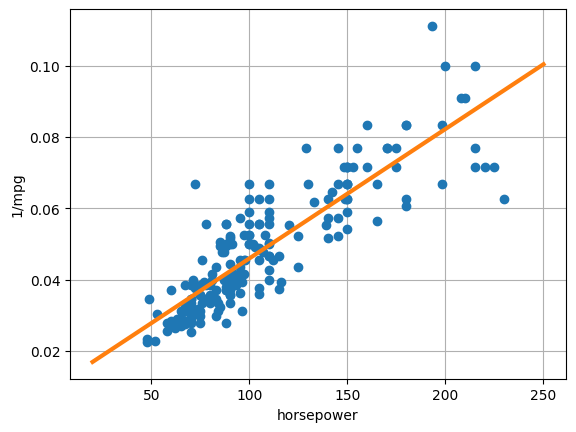

In [40]:

xplt_inv = np.linspace(20,250,100)
zplt_inv = beta1_inv*xplt_inv + beta0_inv
plt.plot(xtr,ztr,'o')
plt.plot(xplt_inv,zplt_inv,'-',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)

Finally, we compute the estimate in the original domain:  $\hat{y}=1/\zhat{z}$.  We plot the data, original linear fit and the linear fit with inversion.

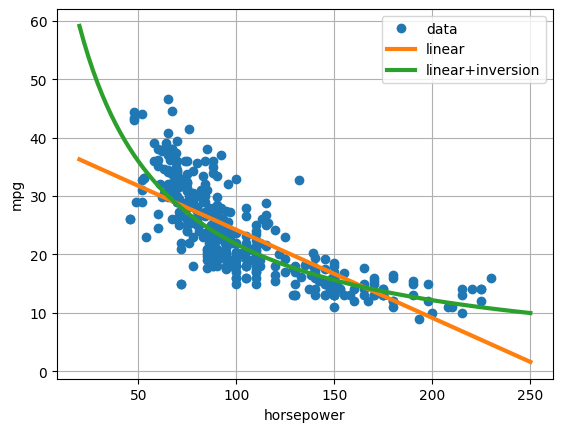

In [41]:
yplt_inv = 1/zplt_inv
plt.plot(x,y,'o')
plt.plot(xplt,yplt,'-',linewidth=3)
plt.plot(xplt_inv,yplt_inv,'-',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)
plt.legend(['data', 'linear', 'linear+inversion'])

We can conclude by comparing the MSE using the linear fit and the linear fit+inversion.  We see that we get a slightly reduced error using the nonlinear transformation.

In [42]:
zhat_inv = beta0_inv + beta1_inv*xts
yhat_inv = 1/zhat_inv
mse_ts_inv = np.mean((yhat_inv-yts)**2)
print("Test MSE = {0:7.2f} (linear)".format(mse_ts))
print("Test MSE = {0:7.2f} (linear+inversion)".format(mse_ts_inv))

Test MSE =   26.59 (linear)
Test MSE =   25.28 (linear+inversion)
